# **Analyzing Financial Statements in Python**

## **The Cash Flow Statement**

In this chapter, you’ll analyze the cash flow statement and use its information to compute and interpret financial ratios. Using Seaborn to create informative plots that compare financial ratios across different companies, you'll build on your existing knowledge of Python and data visualization. By the end of this chapter, you'll have the skills to extract insights from cash flow statements using Python and handle messy, real-world data sets with missing data.

## **Compute net cash flow**


In the last video, you saw what cash outflows and inflows are. In this exercise, you'll put that knowledge to the test. You'll add and subtract transactions to the net income to compute net cash flow. The exercise has one transaction from each part of the cash flow statement: cash flow from operating, investing, and financing activities.

In [1]:
net_profit = 1000

decrease_in_accounts_recievable = 20

sale_of_property = 430

dividends_paid = 50

# Fill in the blanks
net_cash_flow = net_profit + decrease_in_accounts_recievable + sale_of_property - dividends_paid
print(net_cash_flow)

1400


## **Merging financial statements**


You just learned to read JSON data into Python and compute two ratios from the cash flow statement. Computing the cash flow to net income ratio and operating cash flow ratio not only needs information from a company's cash flow statement, but also the income statement and balance sheet.

In this exercise, you'll practice loading JSON data into Python using pandas and merging it with the income statement and balance sheet data.

pandas has already been loaded for you as pd. The datasets with balance sheet and income statement information are called balance_sheet and income_statement, respectively. These have also been loaded for you.

In [2]:
import pandas as pd

In [3]:
balance_sheet = pd.read_excel('balance_sheet.xlsx')

In [6]:
income_statement = pd.read_excel('financials.xlsx')

In [7]:
# Read cash flow data
cash_flow = pd.read_json("cash_flow_tech.json")

# Merge income statement data with balance sheet data
merged_income_statement_balance_sheet = pd.merge(income_statement, balance_sheet, on=["Year", "company"])

# Now merge it with cash flow data
merged_all = pd.merge(cash_flow, merged_income_statement_balance_sheet, on=["Year", "company"])

In [8]:
cash_flow.head()

,Year,Capital Expenditures,Change In Cash,Change To Account Receivables,Change To Inventory,Change To Liabilities,Change To Netincome,Change To Operating Activities,Depreciation,Dividends Paid,...,Net Income,Other Cashflows From Financing Activities,Other Cashflows From Investing Activities,Repurchase Of Stock,Total Cash From Financing Activities,Total Cash From Operating Activities,Total Cashflows From Investing Activities,comp_type,company,Effect Of Exchange Rate
0,2019,-10495000000,24311000000,245000000,-2.890000e+08,-2548000000,5076000000,-896000000,12547000000,-1.411900e+10,...,55256000000,-105000000.0,-1.078000e+09,-6.971400e+10,-90976000000,69391000000,45896000000,tech,AAPL,NaN
1,2020,-7309000000,-10435000000,6917000000,-1.270000e+08,-1981000000,6517000000,881000000,11056000000,-1.408100e+10,...,57411000000,754000000.0,-9.090000e+08,-7.599200e+10,-86820000000,80674000000,-4289000000,tech,AAPL,NaN
2,2021,-11085000000,-3860000000,-10125000000,-2.642000e+09,14002000000,2985000000,-6146000000,11284000000,-1.446700e+10,...,94680000000,976000000.0,-3.520000e+08,-9.252700e+10,-93353000000,104038000000,-14545000000,tech,AAPL,NaN
3,2022,-10708000000,-10952000000,-1823000000,1.484000e+09,9926000000,10044000000,-8387000000,11104000000,-1.484100e+10,...,99803000000,-160000000.0,-1.780000e+09,-9.562500e+10,-110749000000,122151000000,-22354000000,tech,AAPL,NaN
4,2019,-13925000000,-590000000,-2812000000,5.970000e+08,4694000000,-2521000000,-1542000000,11600000000,-1.381100e+10,...,39240000000,-675000000.0,-1.241000e+09,-1.954300e+10,-36887000000,52185000000,-15773000000,tech,MSFT,-115000000.0


In [9]:
merged_all.head()

,Year,Capital Expenditures,Change In Cash,Change To Account Receivables,Change To Inventory,Change To Liabilities,Change To Netincome,Change To Operating Activities,Depreciation,Dividends Paid,...,Total Current Liabilities,Total Liab,Total Stockholder Equity,comp_type_y,Deferred Long Term Asset Charges,Good Will,Intangible Assets,Capital Surplus,Minority Interest_y,Deferred Long Term Liab
0,2019,-10495000000,24311000000,245000000,-2.890000e+08,-2548000000,5076000000,-896000000,12547000000,-1.411900e+10,...,105718000000,248028000000,90488000000,tech,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,-7309000000,-10435000000,6917000000,-1.270000e+08,-1981000000,6517000000,881000000,11056000000,-1.408100e+10,...,105392000000,258549000000,65339000000,tech,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,-11085000000,-3860000000,-10125000000,-2.642000e+09,14002000000,2985000000,-6146000000,11284000000,-1.446700e+10,...,125481000000,287912000000,63090000000,tech,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,-10708000000,-10952000000,-1823000000,1.484000e+09,9926000000,10044000000,-8387000000,11104000000,-1.484100e+10,...,153982000000,302083000000,50672000000,tech,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,-13925000000,-590000000,-2812000000,5.970000e+08,4694000000,-2521000000,-1542000000,11600000000,-1.381100e+10,...,69420000000,184226000000,102330000000,tech,7.536000e+09,4.202600e+10,7.750000e+09,NaN,NaN,NaN


In [10]:
merged_all.columns

Index(['Year', 'Capital Expenditures', 'Change In Cash',
       'Change To Account Receivables', 'Change To Inventory',
       'Change To Liabilities', 'Change To Netincome',
       'Change To Operating Activities', 'Depreciation', 'Dividends Paid',
       'Investments', 'Issuance Of Stock', 'Net Borrowings', 'Net Income_x',
       'Other Cashflows From Financing Activities',
       'Other Cashflows From Investing Activities', 'Repurchase Of Stock',
       'Total Cash From Financing Activities',
       'Total Cash From Operating Activities',
       'Total Cashflows From Investing Activities', 'comp_type', 'company',
       'Effect Of Exchange Rate', 'Cost Of Revenue', 'Discontinued Operations',
       'Ebit', 'Effect Of Accounting Charges', 'Extraordinary Items',
       'Gross Profit', 'Income Before Tax', 'Income Tax Expense',
       'Interest Expense', 'Minority Interest_x', 'Net Income_y',
       'Net Income Applicable To Common Shares',
       'Net Income From Continuing Ops', 'Non

#### **Compute cash flow statement ratios**


In this exercise, you'll compute the operating cash flow ratio and cash flow to net income ratio.

Recall that the operating cash flow ratio tells us how many times a company can pay off its short-term obligations from the cash it generates from the core of its business.

The cash flow to net income ratio gives us an idea of the proportion of cash flows earned from operating activities.

The pandas DataFrame merged_dat has already been loaded for you. It contains information from the cash flow statement, income statement, and balance sheet. pandas has been loaded as pd.

In [17]:
merged_all["cash_flow_to_net_income"] = merged_all["Total Cash From Operating Activities"] / merged_all["Net Income_y"]
merged_all["operating_cash_flow"] = merged_all["Total Cash From Operating Activities"] / merged_all["Total Current Liabilities"]

# Compute the average ratios
average_ratios = merged_all.pivot_table(index="Year", values=["cash_flow_to_net_income","operating_cash_flow"])

average_ratios

,cash_flow_to_net_income,operating_cash_flow
Year,,
2018,1.978225,2.002246
2019,1.892268,1.092949
2020,1.763830,1.171911
2021,1.282083,1.235200
2022,1.223986,0.864842


#### **Imputing and filling in missing values using averages**


When you want to do your analysis, you will likely use your own data. Datasets often have some missing values. In this exercise, you'll practice imputing these missing values. Imputing missing values is important as you do not want missing values to be an obstacle in our analysis.

pandas has been loaded with the alias pd and NumPy has been loaded with the alias np. A pandas DataFrame called dataset has been loaded for you. It has the column "Total Current Liabilities", which has some missing values in it.

In [ ]:
impute_by_company = dataset.groupby("company")["Total Current Liabilities"].transform("mean")
impute_by_comp_type = dataset.groupby("comp_type")["Total Current Liabilities"].transform("mean")

# Fill in the missing values with imputation
dataset["current_liab_avg_comp"] = dataset["Total Current Liabilities"].fillna(impute_by_company)

# Fill in the missing values with imputation
dataset["current_liab_avg_comp_type"] = dataset["Total Current Liabilities"].fillna(impute_by_comp_type)

#### **Imputing missing values with percentiles**


In this exercise, you'll continue to practice imputing missing values. Unlike the previous exercise, however, you will use percentiles in place of averages to compute the imputations. Using percentiles is a great way to get conservative imputations. Imputing missing values in a column using percentiles involves the following underlying steps:

Remove the missing values from the column of interest.
Then compute the, say 70th percentile of the numbers from the column you just removed missing values from.
70th percentile worst value depends on the column you compute the percentile from:
For instance, having a large amount of assets is considered to be a good thing, so a low amount of assets is worse. The 70th percentile worst value of assets is actually just the 30th percentile of assets.
Analogously, high amounts of liabilities is considered bad. So a 70th worst value of liabilities is simply its 70th percentile.
pandas has been loaded with the alias pd and NumPy has been loaded with the alias np. A pandas DataFrame called dataset has been loaded for you. It has the column "Total Current Liabilities", which has some missing values.

In [ ]:
# Impute missing value with average non-missing values of company
impute_by_company = dataset.groupby("company")["Total Current Liabilities"].transform(lambda x: np.nanquantile(x, 0.7))

# Impute missing value with average non-missing values of industry
impute_by_comp_type = dataset.groupby("comp_type")["Total Current Liabilities"].transform(lambda x: np.nanquantile(x, 0.7))

# Fill in the missing values using imputation
dataset["current_liab_quant_comp"] = dataset["Total Current Liabilities"].fillna(impute_by_company)

# Fill in the missing values using imputation
dataset["current_liab_quant_comp_type"] = dataset["Total Current Liabilities"].fillna(impute_by_comp_type)

#### **Merging financial statements and filling missing values**


You just learned about cash flow to net income and operating cash flow ratio. Recall that net income is not entirely earned in cash, and the cash flow to net income ratio tells us the rate of net income earned in cash. The operating cash flow ratio tells us whether the company has enough cash to meet its short-term commitments.

In this exercise, you'll compute both of these ratios for Apple and Microsoft and then plot them. A side-by-side plot of ratios of companies in the same industry helps visualize their differences.

You will usually get only some of the necessary information from different financial statements in any one DataFrame. You will likely get it from different sources and have to merge them. In addition, data from the wild often has missing values. This exercise involves filling in NaNs and merging DataFrames.

A pandas DataFrame dataset has been loaded for you. It contains information about Microsoft and Apple's income statements and balance sheets. Another pandas DataFrame cash_flow_statement has also been loaded for you. This has some of Apple and Microsoft's cash flow information.

In [ ]:
# Merge dataset with cash_flow_statement
merged_dat = pd.merge(dataset, cash_flow_statement, on=["Year", "company"])

# Fill in the NaN values in Total Current Liabilities with the mean
merged_dat["Total Current Liabilities"] = merged_dat["Total Current Liabilities"].fillna(merged_dat["Total Current Liabilities"].mean())
cash_flow_statement
# Compute operating cash flow ratio
merged_dat["operating_cash_flow"] = merged_dat["Total Cash From Operating Activities"] / merged_dat["Total Current Liabilities"]

#### **Plotting cash flow ratios**


Sometimes, you might want to plot several line plots in one image. However, having too many lines in one plot will make it challenging to read. Making separate facets for every line is more elegant: the figure will look neat and more interpretable.

A pandas DataFrame plot_df has already been loaded for you. It has the columns "Year", "company","cash_flow_to_net_income" and "operating_cash_flow". Seaborn has been loaded with the alias sns.

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
plot_df = merged_all[["Year", "company","cash_flow_to_net_income","operating_cash_flow"]]
plot_df

,Year,company,cash_flow_to_net_income,operating_cash_flow
0,2019,AAPL,1.255809,0.656378
1,2020,AAPL,1.405201,0.765466
2,2021,AAPL,1.098838,0.829114
3,2022,AAPL,1.223921,0.793281
4,2019,MSFT,1.329893,0.751729
5,2020,MSFT,1.370227,0.839096
6,2021,MSFT,1.252469,0.865583
7,2022,MSFT,1.224051,0.936402
8,2018,GOOG,1.560743,1.385644
9,2019,GOOG,1.587514,1.205635


In [25]:
# Melt the DataFrame to prepare for plotting
melt_data = plot_df.melt(id_vars=["Year","company"], var_name="Ratio")
melt_data

,Year,company,Ratio,value
0,2019,AAPL,cash_flow_to_net_income,1.255809
1,2020,AAPL,cash_flow_to_net_income,1.405201
2,2021,AAPL,cash_flow_to_net_income,1.098838
3,2022,AAPL,cash_flow_to_net_income,1.223921
4,2019,MSFT,cash_flow_to_net_income,1.329893
5,2020,MSFT,cash_flow_to_net_income,1.370227
6,2021,MSFT,cash_flow_to_net_income,1.252469
7,2022,MSFT,cash_flow_to_net_income,1.224051
8,2018,GOOG,cash_flow_to_net_income,1.560743
9,2019,GOOG,cash_flow_to_net_income,1.587514


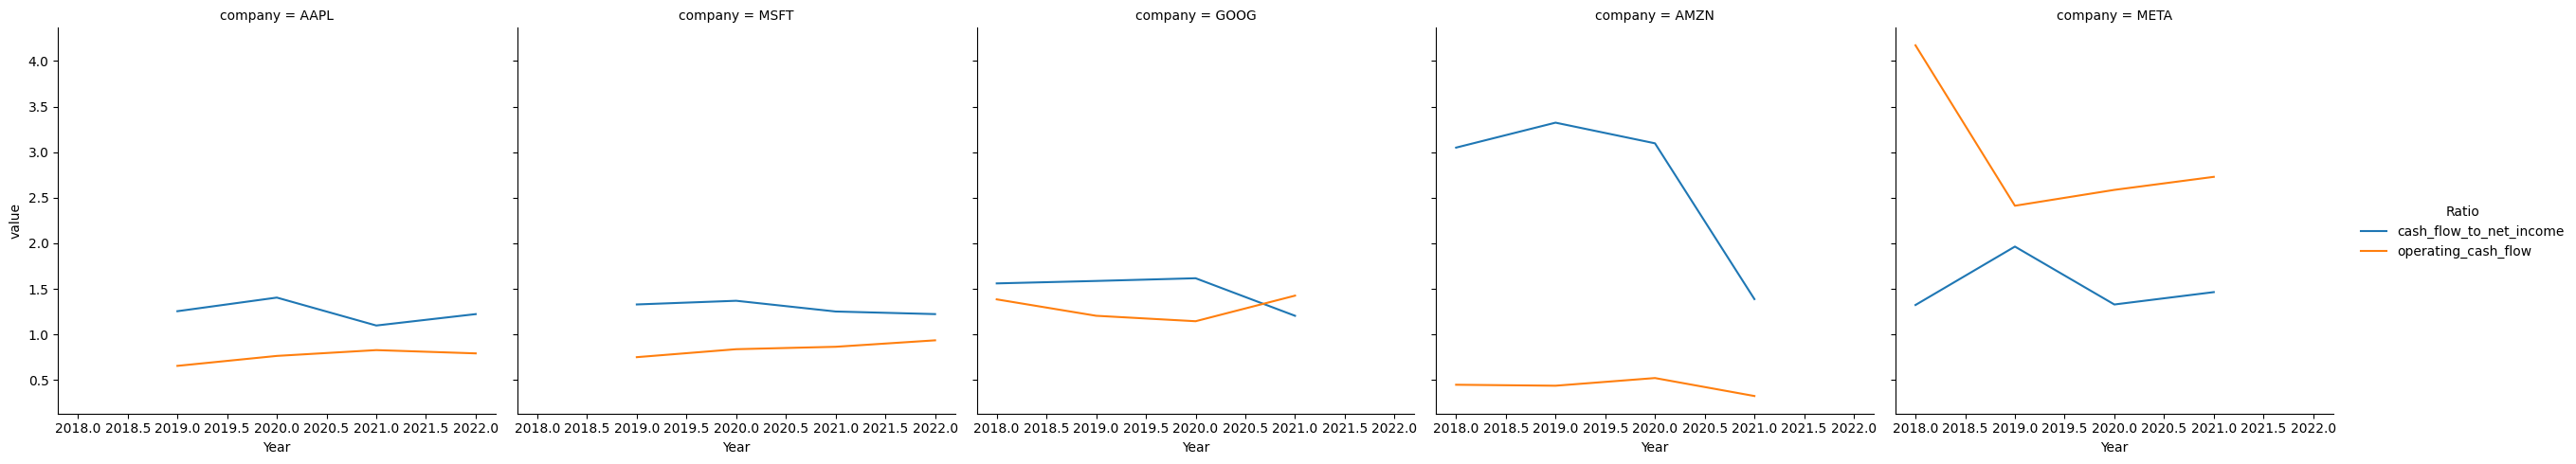

In [26]:
# Plot your melted DataFrame
sns.relplot(data=melt_data, x="Year", y="value", col="company", kind="line", hue="Ratio")

plt.show()